# Análisis de datos de control de ciber

Se utiliza el programa Control de Ciber para registrar y calcular el tiempo y el monto a cobrar por la renta de computadoras, el progra puede exportar los datos en un archivo CSV, pero tiene muchos datos que no sirven en este caso para el analisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import datetime as dt
import numpy as np

### Cargamos los 6 datasets

Se tienen 6 datasets de los registros, muchos datos estan duplicados de un dataset a otro, por lo que tendremos cuidado.

In [2]:
directorio = "C:/Users/Omar/Downloads/datos/ciber/"

In [3]:
#19-03-17  -  19-07-21
#1637
lan1 = pd.read_csv(directorio + "7-26-2019.csv",encoding="latin-1")#ISO-8859-1
lan1.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
1632,1633,1007.0,190721.log,13:10:25,Cobro de PC,7.0,12:58:18,13:10:25,0:12:00,3.0,0.0,3.0,3.0,0,NaN,
1633,1634,NaN,190721.log,13:46:23,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1634,1635,NaN,190721.log,14:44:41,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b
1635,1636,1008.0,190721.log,15:52:18,Venta de Extra,7.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
1636,1637,1008.0,190721.log,15:52:18,Cobro de PC,7.0,14:44:47,15:52:18,1:07:29,11.0,0.0,11.0,11.0,0,NaN,


In [4]:
#19-03-17  -  19-04-28
lan2 = pd.read_csv(directorio + "detalle.csv",encoding='latin-1')
lan2.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
548,549,NaN,190428.log,12:58:29,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b
549,550,605.0,190428.log,13:29:54,Venta de Extra,7.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
550,551,605.0,190428.log,13:29:54,Cobro de PC,7.0,12:59:02,13:29:54,0:30:00,5.0,0.0,5.0,5.0,0,NaN,
551,552,606.0,190428.log,14:03:25,Venta de Extra,7.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
552,553,606.0,190428.log,14:03:25,Cobro de PC,7.0,13:33:10,14:03:25,0:30:00,5.0,0.0,5.0,5.0,0,NaN,


In [5]:
lan3 = pd.read_csv(directorio + "detalle1.csv",encoding="latin-1")
lan3.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
232,233,481.0,190329.log,20:23:41,Cobro de PC,1.0,19:56:13,20:23:41,0:27:26,4.5,0.0,4.5,4.5,0,NaN,
233,234,482.0,190329.log,20:23:45,Cobro de PC,2.0,19:56:18,20:23:45,0:27:25,4.5,0.0,4.5,4.5,0,NaN,
234,235,NaN,190329.log,20:23:48,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
235,236,NaN,190329.log,20:23:48,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
236,237,NaN,190330.log,11:27:23,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b


In [6]:
lan4 = pd.read_csv(directorio + "detalle5.csv",encoding="latin-1")
lan4.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
448,449,556.0,190413.log,21:08:13,Cobro de PC,1.0,20:16:05,21:08:13,0:52:02,8.5,0.0,8.5,8.5,0,NaN,
449,450,NaN,190413.log,21:11:12,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
450,451,NaN,190413.log,21:11:12,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
451,452,NaN,190414.log,12:36:47,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b
452,453,NaN,190414.log,12:42:56,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b


In [7]:
lan5 = pd.read_csv(directorio + "detalle44.csv",encoding="latin-1")
lan5.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
345,346,518.0,190406.log,15:53:51,Cobro de PC,8.0,15:08:27,15:53:51,0:45:20,7.5,0.0,7.5,7.5,0,NaN,
346,347,519.0,190406.log,19:18:49,Cobro de PC,8.0,18:23:48,19:18:49,0:54:59,9.0,0.0,9.0,9.0,0,NaN,
347,348,NaN,190406.log,19:22:06,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
348,349,NaN,190406.log,19:22:06,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
349,350,NaN,190407.log,13:02:11,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b


In [8]:
lan6 = pd.read_csv(directorio + "historicos.csv",encoding="latin-1")
lan6.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
7351,7352,393.0,190316.log,15:20:18,Cobro de PC,4.0,13:51:39,15:20:18,1:28:37,14.76,0.0,14.76,14.76,0,NaN,
7352,7353,394.0,190316.log,15:21:18,Cobro de PC,6.0,14:34:41,15:21:18,0:46:35,7.76,0.0,7.76,7.76,0,NaN,
7353,7354,395.0,190316.log,16:08:06,Cobro de PC,9.0,15:21:14,16:08:06,0:46:50,7.80,0.0,7.80,7.80,0,NaN,
7354,7355,396.0,190316.log,19:05:05,Cobro de PC,6.0,18:15:37,19:05:05,0:49:02,8.17,0.0,8.17,8.17,0,NaN,
7355,7356,NaN,190317.log,12:20:37,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b


### Unimos los 6 datasets en uno

In [9]:
data = pd.concat([lan2,lan3,lan4,lan5,lan6,lan1],axis=0)
data.shape

(10586, 16)

In [10]:
data = data.drop(data["Descripción"]== "ZONA CORRUPTA DEL FICHERO",axis=0)
data.shape

(10574, 16)

In [11]:
data["Descripción"].unique().tolist()

['Cobro de PC',
 'Venta de Extra',
 'Impresión',
 'Venta Directa',
 'Cierre del Servidor',
 'Arranque del Servidor',
 'ZONA CORRUPTA DEL FICHERO']

In [12]:
data.describe()

,Registro,Ticket,PC,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa
count,10574.000000,6098.000000,6069.000000,4832.000000,6069.000000,4832.000000,4832.000000,10574.0,29.000000
mean,2718.495461,1251.912430,7.498435,8.937966,41.644703,35.090873,34.602939,0.0,9.655172
std,2304.134858,944.352076,5.145850,13.053939,2217.299548,1757.248148,1757.245086,0.0,11.342952
min,3.000000,0.000000,1.000000,3.000000,-4.000000,3.000000,0.000000,0.0,1.000000
25%,539.000000,468.000000,2.000000,4.170000,0.000000,4.880000,4.500000,0.0,2.000000
50%,2069.500000,924.000000,7.000000,6.500000,0.000000,7.375000,7.030000,0.0,5.000000
75%,4712.750000,2016.750000,13.000000,10.280000,1.000000,11.152500,11.000000,0.0,8.000000
max,7356.000000,3273.000000,15.000000,263.970000,122154.000000,122157.000000,122157.000000,0.0,32.000000


In [13]:
data.head()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
2,3,397.0,190317.log,14:14:00,Cobro de PC,1.0,13:18:51,14:14:00,0:54:40,9.11,0.0,9.11,9.11,0,NaN,
3,4,398.0,190317.log,14:17:25,Cobro de PC,1.0,14:17:03,14:17:25,0:00:01,3.00,0.0,3.00,0.00,0,NaN,Ejemplo
4,5,399.0,190317.log,14:18:36,Venta de Extra,8.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
5,6,399.0,190317.log,14:18:36,Cobro de PC,8.0,13:27:59,14:18:36,0:50:15,8.00,0.0,8.00,8.00,0,NaN,Ejemplo
6,7,400.0,190317.log,14:20:45,Cobro de PC,2.0,14:20:32,14:20:45,0:00:01,3.00,0.0,3.00,3.00,0,NaN,Ejemplo


### Revisamos los nombres de las columnas

In [14]:
data.columns.tolist()

['Registro',
 'Ticket',
 'Origen',
 'Hora',
 'Descripción',
 'PC',
 'Hora Inicio',
 'Hora Fin',
 'Tiempo Total',
 'Internet',
 'Extras',
 'Cobrar',
 'Cobrado',
 'Com.',
 'Vta Directa',
 'Nota']

Eliminamos los datos duplicados

In [15]:
dataf = data.drop_duplicates(subset=["Origen","Hora","Descripción"])

In [16]:
dataf.shape

(8400, 16)

In [17]:
dataf.sort_values(by="Origen",ascending=False)

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
1636,1637,1008.0,190721.log,15:52:18,Cobro de PC,7.0,14:44:47,15:52:18,1:07:29,11.00,0.0,11.00,11.00,0,NaN,
1635,1636,1008.0,190721.log,15:52:18,Venta de Extra,7.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
1634,1635,NaN,190721.log,14:44:41,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b
1633,1634,NaN,190721.log,13:46:23,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1632,1633,1007.0,190721.log,13:10:25,Cobro de PC,7.0,12:58:18,13:10:25,0:12:00,3.00,0.0,3.00,3.00,0,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,2.0,170328.log,19:06:33,Cobro de PC,1.0,17:10:04,19:06:33,1:53:43,18.95,7.0,25.95,25.95,0,NaN,
6,7,2.0,170328.log,19:06:33,Venta de Extra,1.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN,1 Varios
5,6,1.0,170328.log,18:59:25,Cobro de PC,13.0,18:56:39,18:59:25,0:02:38,3.00,0.0,3.00,0.00,0,NaN,
4,5,1.0,170328.log,18:59:25,Venta de Extra,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0 ERROR: Artículo desconocido


In [18]:
dataf.sort_values(by="Cobrado",ascending=False)

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
5993,5994,2858.0,181017.log,15:11:35,Cobro de PC,1.0,15:11:26,15:11:35,0:00:04,3.00,122154.0,122157.00,122157.00,0,NaN,
1223,1224,322.0,171015.log,17:34:38,Cobro de PC,15.0,21:14:08,17:34:38,20:20:29,203.41,10.0,213.41,213.41,0,NaN,
3195,3196,1044.0,180416.log,17:47:21,Cobro de PC,5.0,20:46:44,17:47:21,21:00:35,210.09,0.0,210.09,210.09,0,NaN,
3132,3133,1010.0,180410.log,16:30:47,Cobro de PC,2.0,19:54:51,16:30:47,20:35:51,205.97,0.0,205.97,205.97,0,NaN,
3131,3132,1009.0,180410.log,16:30:40,Cobro de PC,1.0,19:54:50,16:30:40,20:35:48,205.96,0.0,205.96,205.96,0,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1631,NaN,190721.log,12:50:12,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b
1631,1632,1007.0,190721.log,13:10:25,Venta de Extra,7.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
1633,1634,NaN,190721.log,13:46:23,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1634,1635,NaN,190721.log,14:44:41,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b


In [20]:
dataf.groupby("PC").Cobrado.count().sort_values(ascending=False)

PC
1.0     827
15.0    491
14.0    458
9.0     410
13.0    383
2.0     354
7.0     340
6.0     216
8.0     206
3.0     169
5.0     146
4.0     142
12.0     99
11.0     20
10.0      9
Name: Cobrado, dtype: int64

In [21]:
eje_x = dataf[(dataf.Descripción == "Cobro de PC") & (dataf.Cobrar != 0) & (dataf.Cobrar < 50)  ].groupby("Origen").Cobrado.count()
ex = eje_x.values
ex

array([ 2,  2,  1,  1,  1,  4,  2,  3,  1,  1,  2,  1,  1,  1,  4,  2,  1,
        1,  3,  1,  2,  1,  1,  3,  2,  1,  1,  4,  1,  1,  3,  1,  4,  3,
        3,  2,  1,  5,  4,  1,  5,  1,  1,  4,  2,  1,  1,  1,  2,  6,  1,
        2,  1,  2,  2,  4,  2,  2,  2,  1,  2,  2,  4,  1,  1,  2,  1,  2,
        3,  1,  2,  1,  4,  3,  1,  4,  1,  3,  4, 11,  8,  3,  2,  2,  7,
        3,  6, 12,  9,  4,  9,  6,  5,  4,  1,  3,  1,  2,  1,  1,  7,  4,
        5,  5,  2,  2,  8,  5,  2,  8,  5,  3,  4,  6,  4,  4,  1,  9,  4,
        5,  3,  3,  4,  1, 13,  3,  2,  4,  6,  4,  7,  7,  5, 14,  4,  3,
        7,  4,  6,  2,  3,  3,  2,  7,  1,  6,  5,  7,  4,  5,  1,  8,  4,
        7, 12,  6,  4,  5,  6,  2,  5,  3,  5,  6,  2,  2,  2,  2,  1,  1,
        2,  1,  5,  3,  8,  1,  2,  4,  7,  6,  2,  6,  5,  7, 10,  5,  3,
       12,  2,  7, 12, 13,  7,  7,  4,  3, 10,  5,  7,  6,  5,  4, 10,  5,
        2,  5,  5,  1,  8,  5, 11,  8, 10, 12,  1,  6,  9,  8,  5,  6,  1,
        5,  1,  7,  4,  6

In [22]:
eje_y = dataf[(dataf.Descripción == "Cobro de PC") & (dataf.Cobrar != 0) & (dataf.Cobrar < 50)  ].groupby("Origen").Cobrado.sum()
ey = eje_y.values
ey

array([ 25.95,  13.86,   3.  ,   3.  ,  12.  ,  49.37,  15.74,  22.52,
        16.06,   5.6 ,  38.98,  12.75,  18.1 ,   9.6 ,  23.93,  15.07,
        16.96,   8.96,  17.79,   7.67,  10.5 ,   7.5 ,   7.  ,  19.88,
         6.38,   7.49,  16.  ,  22.41,   6.66,   7.65,  15.38,   8.18,
        28.56,  19.38,  41.7 ,   8.47,  10.04,  29.24,  21.  ,   7.8 ,
        34.  ,   9.5 ,   9.74,  21.48,  29.26,   3.5 ,  24.17,   3.  ,
         9.59,  54.88,   4.  ,  13.96,  11.04,  20.23,  15.09,  28.71,
        26.96,  19.69,  18.36,   3.  ,  30.03,  43.91,  48.97,  19.5 ,
        12.13,  13.35,   5.99,  17.  ,  13.53,  10.12,  10.45,   3.  ,
        33.27,  27.5 ,   4.  ,  46.93,   6.34,  23.36,  32.23, 130.7 ,
        77.33,  12.16,  17.65,   9.  ,  46.72,  32.34,  85.09,  48.71,
        99.39,  44.17,  64.03,  78.21,  26.58,  51.55,  14.19,  35.09,
        13.5 ,  23.27,   8.24,  12.5 ,  74.89,  35.93,  61.02,  51.97,
        10.04,  24.89,  62.67,  34.05,   9.06,  50.97,  42.08,  42.5 ,
      

Text(0, 0.5, 'Recaudado')

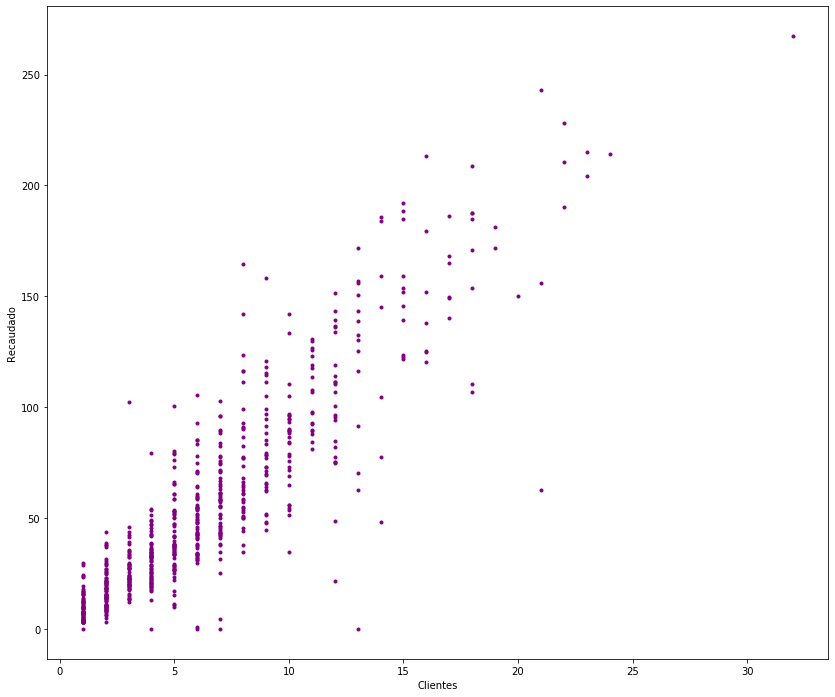

In [23]:
plt.figure(figsize=(14,12));
plt.plot(ex,ey,'.',color='purple')
plt.xlabel("Clientes")
plt.ylabel("Recaudado")

In [24]:
desviacionx = 0
contador = 0
promediox = sum(ex)/(len(ex))
for valor in ex:
    contador = contador + ((valor-promediox)**2)
desviacionx = m.sqrt(contador/len(ex))
desviacionx

4.634267703357952

In [25]:
desviaciony = 0
contador = 0
promedioy = sum(ey)/(len(ey))
for valor in ey:
    contador = contador + ((valor-promedioy)**2)
desviaciony = m.sqrt(contador/len(ey))
desviaciony

47.080767865796375

In [26]:
covarianza = 0
suma = 0
for i in range(len(ex)):
    suma = suma +  (ex[i] - promediox) * (ey[i] - [promedioy])
covarianza = suma/len(ex)
int(covarianza)

195

In [29]:
#Coeficiente de correlacion
c = 195/(4.63 * 47.08)
c

0.8945758425986925

In [30]:
#pendiente
b = (47.08/4.63) * 0.8945
b

9.095693304535637

In [32]:
a = promedioy - (promediox * b)
a

-1.7246168896533618

In [33]:
#modelo matematico
# y = 9.095x - 1.72
def modelo(x):
    return 9.095*x-1.72

In [34]:
modelo(10)

89.23

Text(0, 0.5, 'Recaudado')

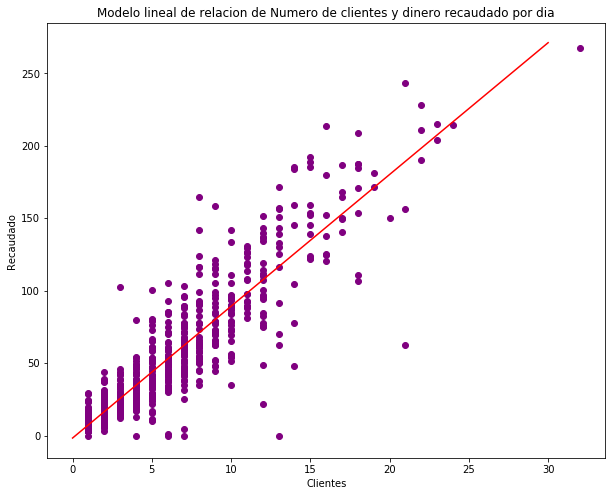

In [35]:
#Graficando nuevamente y comprobando el model lineal 1 full
plt.figure(figsize=(10,8))
plt.title("Modelo lineal de relacion de Numero de clientes y dinero recaudado por dia")
plt.plot(ex,ey,'o',color='purple')
plt.plot([0,30],[modelo(0),modelo(30)],'-',color='red')
plt.xlabel("Clientes")
plt.ylabel("Recaudado")

In [40]:
#modelo inverso
#y = 9.095x - 1.72
def modelo_inverso(y):
    return (y+1.72)/9.095

In [41]:
modelo_inverso(100)

11.184167124793841

## Analisis de lo recaudado por mes

In [44]:
d = dataf

In [45]:
d.head(15)

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
2,3,397.0,190317.log,14:14:00,Cobro de PC,1.0,13:18:51,14:14:00,0:54:40,9.11,0.0,9.11,9.11,0,NaN,
3,4,398.0,190317.log,14:17:25,Cobro de PC,1.0,14:17:03,14:17:25,0:00:01,3.00,0.0,3.00,0.00,0,NaN,Ejemplo
4,5,399.0,190317.log,14:18:36,Venta de Extra,8.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
5,6,399.0,190317.log,14:18:36,Cobro de PC,8.0,13:27:59,14:18:36,0:50:15,8.00,0.0,8.00,8.00,0,NaN,Ejemplo
6,7,400.0,190317.log,14:20:45,Cobro de PC,2.0,14:20:32,14:20:45,0:00:01,3.00,0.0,3.00,3.00,0,NaN,Ejemplo
7,8,401.0,190317.log,14:32:25,Venta de Extra,8.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN,1 Varios
8,9,401.0,190317.log,14:32:25,Cobro de PC,8.0,14:18:39,14:32:25,0:13:30,3.00,7.0,10.00,10.00,0,NaN,
9,10,402.0,190317.log,15:24:10,Venta de Extra,2.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,0,NaN,2 Impresion color grande
10,11,402.0,190317.log,15:24:10,Cobro de PC,2.0,15:23:45,15:24:10,0:00:14,3.00,10.0,13.00,13.00,0,NaN,Ejemplo
11,12,403.0,190317.log,15:58:43,Cobro de PC,9.0,15:28:13,15:58:43,0:30:14,5.00,0.0,5.00,5.00,0,NaN,


In [46]:
d.tail()

,Registro,Ticket,Origen,Hora,Descripción,PC,Hora Inicio,Hora Fin,Tiempo Total,Internet,Extras,Cobrar,Cobrado,Com.,Vta Directa,Nota
1632,1633,1007.0,190721.log,13:10:25,Cobro de PC,7.0,12:58:18,13:10:25,0:12:00,3.0,0.0,3.0,3.0,0,NaN,
1633,1634,NaN,190721.log,13:46:23,Cierre del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1634,1635,NaN,190721.log,14:44:41,Arranque del Servidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.647b
1635,1636,1008.0,190721.log,15:52:18,Venta de Extra,7.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,1 Varios
1636,1637,1008.0,190721.log,15:52:18,Cobro de PC,7.0,14:44:47,15:52:18,1:07:29,11.0,0.0,11.0,11.0,0,NaN,


In [49]:
d2 = d[["Origen","Descripción","Cobrar"]]
d2.shape

(8400, 3)

In [48]:
d2.head(10)

,Origen,Descripción,Cobrar
2,190317.log,Cobro de PC,9.11
3,190317.log,Cobro de PC,3.00
4,190317.log,Venta de Extra,NaN
5,190317.log,Cobro de PC,8.00
6,190317.log,Cobro de PC,3.00
7,190317.log,Venta de Extra,NaN
8,190317.log,Cobro de PC,10.00
9,190317.log,Venta de Extra,NaN
10,190317.log,Cobro de PC,13.00
11,190317.log,Cobro de PC,5.00


En esta parte elegir un rango deacuerdo al grupo de todos los datos

In [62]:
d3 = d2[(d2.Descripción == 'Cobro de PC') & (d2.Cobrar != 0) & (d2.Cobrar < 40) & (d2.Cobrar != 3.0)]

In [63]:
d3.head()

,Origen,Descripción,Cobrar
2,190317.log,Cobro de PC,9.11
5,190317.log,Cobro de PC,8.00
8,190317.log,Cobro de PC,10.00
10,190317.log,Cobro de PC,13.00
11,190317.log,Cobro de PC,5.00


In [64]:
d3["Descripción"].unique()

array(['Cobro de PC'], dtype=object)

In [65]:
d3 = d3.drop("Descripción",axis=1)

In [66]:
d3.head()

,Origen,Cobrar
2,190317.log,9.11
5,190317.log,8.00
8,190317.log,10.00
10,190317.log,13.00
11,190317.log,5.00


In [69]:
fechas = d3["Origen"].values

In [70]:
len(fechas)

3537

In [71]:
fechas

array(['190317.log', '190317.log', '190317.log', ..., '190719.log',
       '190720.log', '190721.log'], dtype=object)

In [72]:
fecha = []
for f in fechas:
    fecha.append(str(20) + f[0:2] + '-' + f[2:4] + '-' + f[4:6])

len(fecha)d

3537

In [77]:
fe = pd.DataFrame(fecha)
fe.head(12)

,0
0,2019-03-17
1,2019-03-17
2,2019-03-17
3,2019-03-17
4,2019-03-17
5,2019-03-17
6,2019-03-17
7,2019-03-17
8,2019-03-17
9,2019-03-17


In [78]:
d3.index = range(d3.shape[0])

In [79]:
d4 = pd.concat([d3,fe],axis=1)

In [82]:
d4.shape

(3537, 3)

In [83]:
d4.head()

,Origen,Cobrar,0
0,190317.log,9.11,2019-03-17
1,190317.log,8.00,2019-03-17
2,190317.log,10.00,2019-03-17
3,190317.log,13.00,2019-03-17
4,190317.log,5.00,2019-03-17


In [84]:
d4.tail()

,Origen,Cobrar,0
3532,190719.log,10.0,2019-07-19
3533,190719.log,5.5,2019-07-19
3534,190719.log,4.5,2019-07-19
3535,190720.log,5.0,2019-07-20
3536,190721.log,11.0,2019-07-21


In [85]:
d4 = d4.drop(['Origen'],axis=1)

In [86]:
d4.columns.values

array(['Cobrar', 0], dtype=object)

In [88]:
d4 = d4.rename(columns={0:'Fecha'})
d4.columns.values

array(['Cobrar', 'Fecha'], dtype=object)

In [90]:
d4['Fecha'] = pd.to_datetime(d4['Fecha'])

In [122]:
d5 = d4

In [123]:
d5.index = d5['Fecha']

In [124]:
d5.resample('M').sum()

,Cobrar
Fecha,
2017-03-31,39.81
2017-04-30,316.11
2017-05-31,312.59
2017-06-30,333.66
2017-07-31,183.33
2017-08-31,197.30
2017-09-30,922.65
2017-10-31,1123.16
2017-11-30,957.23


In [129]:
grupo = d5.resample('M').sum()

In [130]:
grupo

,Cobrar
Fecha,
2017-03-31,39.81
2017-04-30,316.11
2017-05-31,312.59
2017-06-30,333.66
2017-07-31,183.33
2017-08-31,197.30
2017-09-30,922.65
2017-10-31,1123.16
2017-11-30,957.23


In [125]:
d5.resample('M').agg([np.sum,np.mean,np.std])

Cobrar                      
                sum       mean        std
Fecha                                    
2017-03-31    39.81  13.270000  11.076520
2017-04-30   316.11   9.878438   5.421683
2017-05-31   312.59   8.683056   3.841404
2017-06-30   333.66  10.426875   5.540528
2017-07-31   183.33  14.102308   7.281983
2017-08-31   197.30   8.220833   3.902456
2017-09-30   922.65  10.366854   6.109182
2017-10-31  1123.16  11.231600   5.958036
2017-11-30   957.23   9.971146   5.403327
2017-12-31   723.98   9.526053   5.127910
2018-01-31  1142.49  10.778208   6.023441
2018-02-28  1450.72  10.074444   5.554803
2018-03-31  1141.02  12.010737   7.422147
2018-04-30  1165.63  10.048534   5.590203
2018-05-31  1822.47  10.783846   5.698627
2018-06-30  2799.31  11.064466   6.754037
2018-07-31  3354.57  11.144751   6.809749
2018-08-31  2610.23  10.358056   5.547049
2018-09-30  2712.55  10.554669   6.205995
2018-10-31  3563.28  10.542249   5.992091
2018-11-30  1636.60  10.424204   5.667447
2018-12-31  1142.65   9.683475   5.303047
2019-01-31   874.87  10.172907   5.486589
2019-02-28   972.54   9.534706   6.160830
2019-03-31  1224.20   8.560839   5.369413
2019-04-30   972.80   9.826263   7.053044
2019-05-31  1049.60   8.396800   3.817826
2019-06-30   972.50   8.456522   3.439046
2019-07-31   473.00   7.883333   3.782617

In [136]:
equis = grupo.index

In [137]:
yes = grupo.Cobrar.values

Text(0.5, 1.0, 'Resumen mensual historico de ingresos')

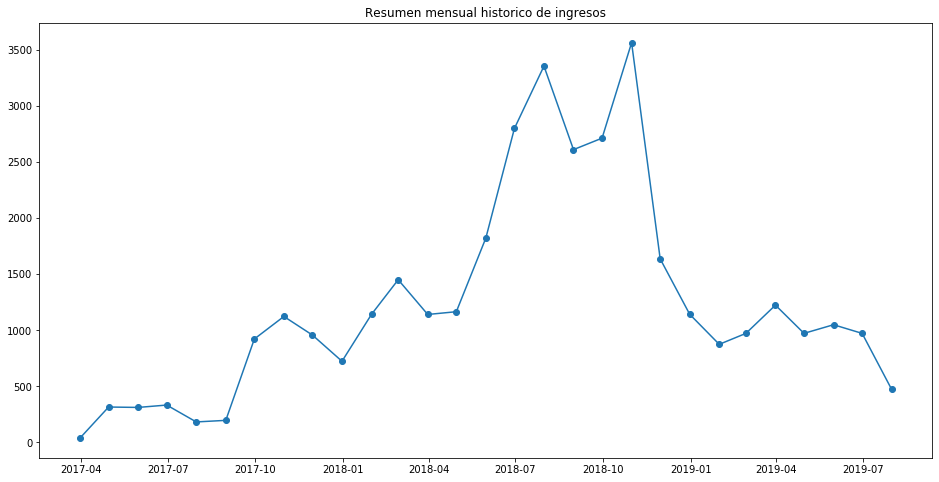

In [139]:
plt.figure(figsize=(16,8))
plt.plot(equis,yes,'o-')
plt.title("Resumen mensual historico de ingresos")

### Comparando meses con diferentes años

In [144]:
g = grupo

In [146]:
g.shape

(29, 1)

In [171]:
uno = g[g.index < "2017-12-31"]
uno

,Cobrar
Fecha,
2017-03-31,39.81
2017-04-30,316.11
2017-05-31,312.59
2017-06-30,333.66
2017-07-31,183.33
2017-08-31,197.30
2017-09-30,922.65
2017-10-31,1123.16
2017-11-30,957.23


In [181]:
meses_uno = uno.index.month_name()
meses_uno

Index(['March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November'],
      dtype='object', name='Fecha')

In [176]:
dos = g[(g.index >= "2018-01-01") & (g.index < "2018-12-31")]
dos

,Cobrar
Fecha,
2018-01-31,1142.49
2018-02-28,1450.72
2018-03-31,1141.02
2018-04-30,1165.63
2018-05-31,1822.47
2018-06-30,2799.31
2018-07-31,3354.57
2018-08-31,2610.23
2018-09-30,2712.55


In [177]:
meses_dos = dos.index.month_name()
meses_dos

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November'],
      dtype='object', name='Fecha')

In [178]:
tres = g[(g.index >= "2019-01-01")]
tres

,Cobrar
Fecha,
2019-01-31,874.87
2019-02-28,972.54
2019-03-31,1224.20
2019-04-30,972.80
2019-05-31,1049.60
2019-06-30,972.50
2019-07-31,473.00


In [179]:
meses_tres = tres.index.month_name()
meses_tres

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July'], dtype='object', name='Fecha')

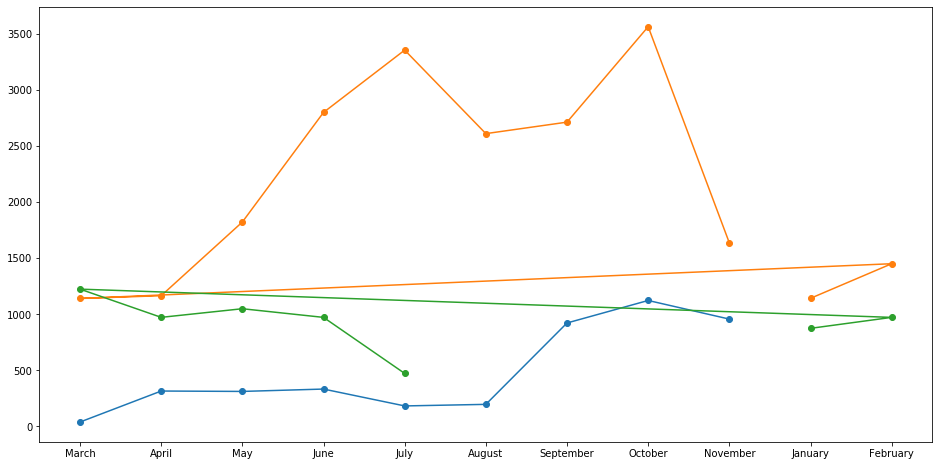

In [182]:
plt.figure(figsize=(16,8))
plt.plot(meses_uno,uno.Cobrar.values,"o-")
plt.plot(meses_dos,dos.Cobrar.values,"o-")
plt.plot(meses_tres,tres.Cobrar.values,"o-")

Text(0.5, 1.0, 'Comparacion de Años')

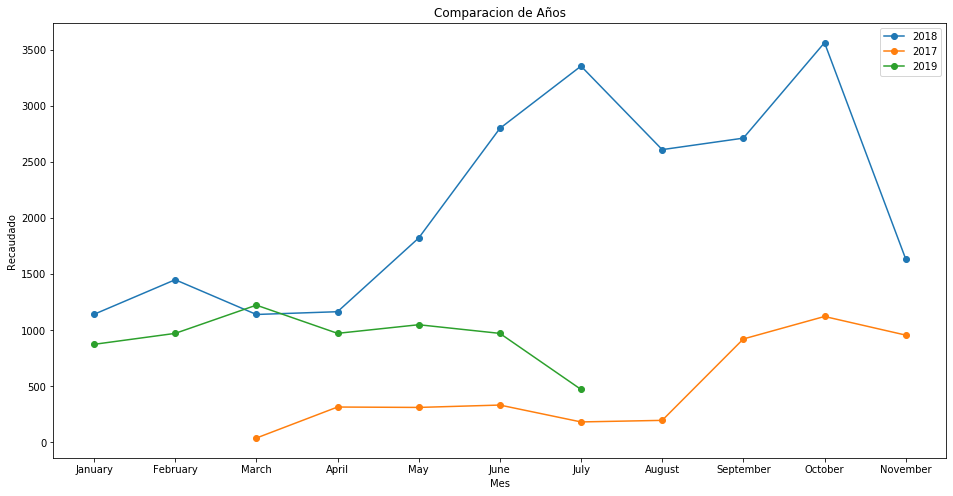

In [199]:
plt.figure(figsize=(16,8))
plt.plot(meses_dos,dos.Cobrar.values,"o-",label = "2018")
plt.plot(meses_uno,uno.Cobrar.values,"o-",label = "2017")
plt.plot(meses_tres,tres.Cobrar.values,"o-",label = "2019")
plt.legend()
plt.xlabel("Mes")
plt.ylabel("Recaudado")
plt.title("Comparacion de Años")